Multi class Text Classification Model to Predict Desired Job Category

In [82]:
#import libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

Retrieve and read the Dataset

In [83]:
path = "linkedin_model.csv" # Define the path

In [84]:
#read csv file
Df_dataset = pd.read_csv(path)

In [85]:
#To view the first few rows,
Df_dataset.head()

,index,category,clean_skills
0,1,HR,"['Performance Management', 'Human Resources', ..."
1,2,HR,"['Talent Acquisition', 'Employee Engagement', ..."
2,3,HR,"['Human Resources', 'Recruiting', 'Team Manage..."
3,4,HR,['']
4,5,HR,"['Team Management', 'Human Resources', 'Employ..."


In [86]:
#To view the last few rows,
Df_dataset.tail()

,index,category,clean_skills
1246,1753,Aviation,['']
1247,1754,Aviation,['']
1248,1755,Aviation,"['Management', 'Goal Seek', 'Customer Service']"
1249,1756,Aviation,"['Tally ERP', 'Workshops']"
1250,1757,Aviation,"['Six Sigma', 'Management', 'Teamwork']"


In [87]:
#get the column headings of the data set
Df_dataset.columns.values

array(['index', 'category', 'clean_skills'], dtype=object)

In [88]:
#Explore the data types of the columns
Df_dataset.dtypes

index            int64
category        object
clean_skills    object
dtype: object

In [89]:
#check for the columns which have missing values more than 30%
col_num=0
TotalObjects =Df_dataset.shape[0]
print ("Column\t\t\t\t\t Null Values%")
for x in Df_dataset:
    nullCount =Df_dataset[x].isnull().sum();
    nullPercent = nullCount*100 / (TotalObjects)
    if nullCount > 0 and nullPercent > 30 :
       col_num=col_num+1
       Df_dataset.drop(x, axis=1,inplace=True)
       print(str(x)+"\t\t\t\t\t "+str(nullPercent))
print ("A total of "+str(col_num)+" deleted !") 

Column					 Null Values%
A total of 0 deleted !


In [90]:
#To get an idea about the null values
Df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1251 entries, 0 to 1250
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         1251 non-null   int64 
 1   category      1251 non-null   object
 2   clean_skills  1251 non-null   object
dtypes: int64(1), object(2)
memory usage: 29.4+ KB


In [91]:
#Getting the null value count
Df_dataset.isnull().sum()

index           0
category        0
clean_skills    0
dtype: int64

In [92]:
pd.unique(Df_dataset['category'].values) 

array(['HR', 'Designing', 'Managment', 'Information Technology',
       'Education', 'Advocate', 'Business Development',
       'Health & Fitness', 'Agricultural', 'BPO', 'Sales', 'Consultant',
       'Digital Media', 'Building & Construction', 'Automobile',
       'Banking', 'Engineering', 'Food & Beverages', 'Finance', 'Apparel',
       'Accountant', 'Architects', 'Public Relations', 'Arts', 'Aviation'],
      dtype=object)

In [93]:
import os
import pandas as pd
import numpy as np
from scipy.stats import randint
import seaborn as sns # used for plot interactive graph.
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [94]:
# loading data
df = pd.read_csv('linkedin_model.csv') # create a dataframe to store data
print(df.shape)

(1251, 3)


In [95]:
df.head(3).T

,0,1,2
index,1,2,3
category,HR,HR,HR
clean_skills,"['Performance Management', 'Human Resources', ...","['Talent Acquisition', 'Employee Engagement', ...","['Human Resources', 'Recruiting', 'Team Manage..."


In [96]:
# Create a new dataframe with two columns
df1 = df[['clean_skills', 'category']].copy() #create a dataframe to store skills and category column
df1

,clean_skills,category
0,"['Performance Management', 'Human Resources', ...",HR
1,"['Talent Acquisition', 'Employee Engagement', ...",HR
2,"['Human Resources', 'Recruiting', 'Team Manage...",HR
3,[''],HR
4,"['Team Management', 'Human Resources', 'Employ...",HR
...,...,...
1246,[''],Aviation
1247,[''],Aviation
1248,"['Management', 'Goal Seek', 'Customer Service']",Aviation
1249,"['Tally ERP', 'Workshops']",Aviation


In [97]:
print(df1.shape)
df1.head(3).T

(1251, 2)


,0,1,2
clean_skills,"['Performance Management', 'Human Resources', ...","['Talent Acquisition', 'Employee Engagement', ...","['Human Resources', 'Recruiting', 'Team Manage..."
category,HR,HR,HR


In [98]:
pd.DataFrame(df1.category.unique()).values   # check for unique categories

array([['HR'],
       ['Designing'],
       ['Managment'],
       ['Information Technology'],
       ['Education'],
       ['Advocate'],
       ['Business Development'],
       ['Health & Fitness'],
       ['Agricultural'],
       ['BPO'],
       ['Sales'],
       ['Consultant'],
       ['Digital Media'],
       ['Building & Construction'],
       ['Automobile'],
       ['Banking'],
       ['Engineering'],
       ['Food & Beverages'],
       ['Finance'],
       ['Apparel'],
       ['Accountant'],
       ['Architects'],
       ['Public Relations'],
       ['Arts'],
       ['Aviation']], dtype=object)

In [99]:
pd.DataFrame(df1.category.unique())  #24 unique job categories

,0
0,HR
1,Designing
2,Managment
3,Information Technology
4,Education
5,Advocate
6,Business Development
7,Health & Fitness
8,Agricultural
9,BPO


In [100]:
# Create a new column 'category_id' with encoded categories 
df1['category_id'] = df1['category'].factorize()[0]
category_id_df = df1[['category', 'category_id']].drop_duplicates()

In [101]:
# Dictionaries for future use
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'category']].values)
# Created new dataframe
df1.head()

,clean_skills,category,category_id
0,"['Performance Management', 'Human Resources', ...",HR,0
1,"['Talent Acquisition', 'Employee Engagement', ...",HR,0
2,"['Human Resources', 'Recruiting', 'Team Manage...",HR,0
3,[''],HR,0
4,"['Team Management', 'Human Resources', 'Employ...",HR,0


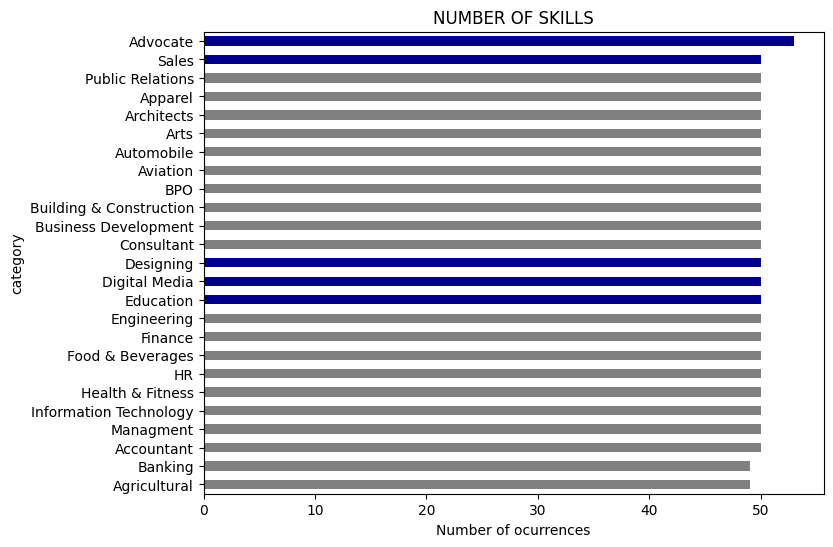

In [102]:
fig = plt.figure(figsize=(8,6))
colors = ['grey','grey','grey','grey','grey','grey','grey','grey','grey',
    'grey','darkblue','darkblue','darkblue']
df1.groupby('category').clean_skills.count().sort_values().plot.barh(
    ylim=0, color=colors, title= 'NUMBER OF SKILLS')
plt.xlabel('Number of ocurrences', fontsize = 10);

Text Preprocessing

In [103]:
#transform texts into vectors using TFIDF
#min_df - remove the words which has occurred in less than ‘min_df’ number of files.
#sublinear_tf - If true -> scale the frequency in logarythemic scale
#Stop words - remove stop words that predefined in english language
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2),  # consider both unigrams and bigrams
                        stop_words='english')
# Transform each complaint into a vector
features = tfidf.fit_transform(df1.clean_skills).toarray()
labels = df1.category_id
print("Each of the %d skill is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))

Each of the 1251 skill is represented by 816 features (TF-IDF score of unigrams and bigrams)


In [104]:
# Finding the three most correlated terms with each of the product categories
N = 3 # top 3 most correlated terms
for category, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])  # computes the chi-squared statistic and p-values for each feature against the selected labels.
  feature_names = np.array(tfidf.get_feature_names_out())[indices]  # chi-squared scores in ascending order. 

  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("n==> %s:" %(category))
  print("  * Most Correlated Unigrams are: %s" %(', '.join(unigrams[-N:])))
  print("  * Most Correlated Bigrams are: %s" %(', '.join(bigrams[-N:])))

n==> Accountant:
  * Most Correlated Unigrams are: income, accounting, tax
  * Most Correlated Bigrams are: tax accounting, accounting tax, income tax
n==> Advocate:
  * Most Correlated Unigrams are: advice, litigation, legal
  * Most Correlated Bigrams are: legal writing, litigation legal, legal advice
n==> Agricultural:
  * Most Correlated Unigrams are: farming, farms, agriculture
  * Most Correlated Bigrams are: operating systems, food safety, rural development
n==> Apparel:
  * Most Correlated Unigrams are: merchandising, apparel, textiles
  * Most Correlated Bigrams are: supply chain, fashion design, excel management
n==> Architects:
  * Most Correlated Unigrams are: architectural, sketchup, architecture
  * Most Correlated Bigrams are: design architecture, sustainable design, architectural design
n==> Arts:
  * Most Correlated Unigrams are: arts, teaching, art
  * Most Correlated Bigrams are: interior design, sales marketing, higher education
n==> Automobile:
  * Most Correlated 

Split the data to train and test sets

In [105]:
#  for train - 75% of data 
X = df1['clean_skills'] # Collection of documents
y = df1['category'] # Target or the labels we want to predict (i.e., the 13 different complaints of products)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state = 0)

List and loop thorugh the list for classifications models

In [106]:
from xgboost import XGBClassifier
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
    XGBClassifier()
]

In [107]:
# 5 Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [108]:
cv_df

,model_name,fold_idx,accuracy
0,RandomForestClassifier,0,0.342629
1,RandomForestClassifier,1,0.348000
2,RandomForestClassifier,2,0.332000
3,RandomForestClassifier,3,0.272000
4,RandomForestClassifier,4,0.228000
5,LinearSVC,0,0.394422
6,LinearSVC,1,0.408000
7,LinearSVC,2,0.336000
8,LinearSVC,3,0.300000
9,LinearSVC,4,0.268000


In [109]:
mean_accuracy = cv_df.groupby('model_name')['accuracy'].mean()
std_deviation = cv_df.groupby('model_name')['accuracy'].std()

for model_name, accuracy, std_dev in zip(mean_accuracy.index, mean_accuracy, std_deviation):
    print(f"Model: {model_name}")
    print(f"Mean Accuracy: {accuracy:.3f}")
    print(f"Standard Deviation: {std_dev:.3f}")
    print()


Model: LinearSVC
Mean Accuracy: 0.341
Standard Deviation: 0.060

Model: LogisticRegression
Mean Accuracy: 0.337
Standard Deviation: 0.063

Model: MultinomialNB
Mean Accuracy: 0.325
Standard Deviation: 0.056

Model: RandomForestClassifier
Mean Accuracy: 0.305
Standard Deviation: 0.052

Model: XGBClassifier
Mean Accuracy: 0.296
Standard Deviation: 0.069



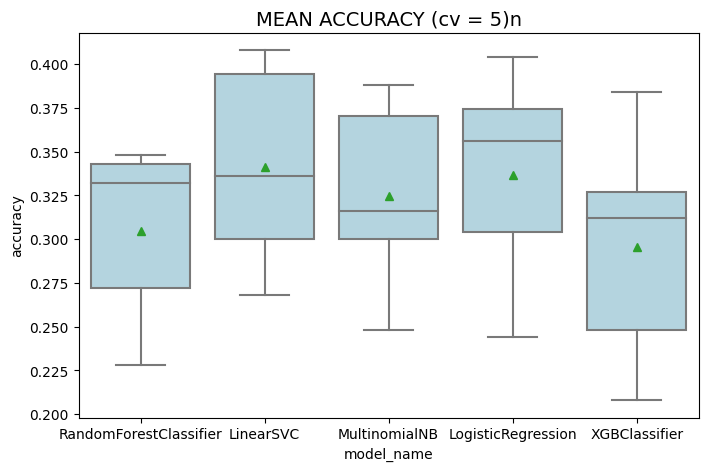

In [110]:
plt.figure(figsize=(8,5))
sns.boxplot(x='model_name', y='accuracy', 
            data=cv_df, 
            color='lightblue', 
            showmeans=True)
plt.title("MEAN ACCURACY (cv = 5)n", size=14);

Text Classification model evaluation

In [111]:
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features, 
                                                               labels, 
                                                               df1.index, test_size=0.25, 
                                                               random_state=1)
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [112]:
# Classification report
#greater no of occurance -> high f1
print('CLASSIFICATIION METRICS')
print(metrics.classification_report(y_test, y_pred, 
                                    target_names= df1['category'].unique()))

CLASSIFICATIION METRICS
                         precision    recall  f1-score   support

                     HR       0.56      0.45      0.50        11
              Designing       0.20      0.06      0.10        16
              Managment       0.10      0.08      0.09        13
 Information Technology       0.50      0.43      0.46        14
              Education       0.38      0.20      0.26        15
               Advocate       0.71      0.36      0.48        14
   Business Development       0.26      0.31      0.29        16
       Health & Fitness       1.00      0.91      0.95        11
           Agricultural       0.67      0.40      0.50        10
                    BPO       1.00      0.30      0.46        10
                  Sales       0.29      0.13      0.18        15
             Consultant       1.00      0.15      0.27        13
          Digital Media       0.50      0.43      0.46        14
Building & Construction       0.56      0.38      0.45        13


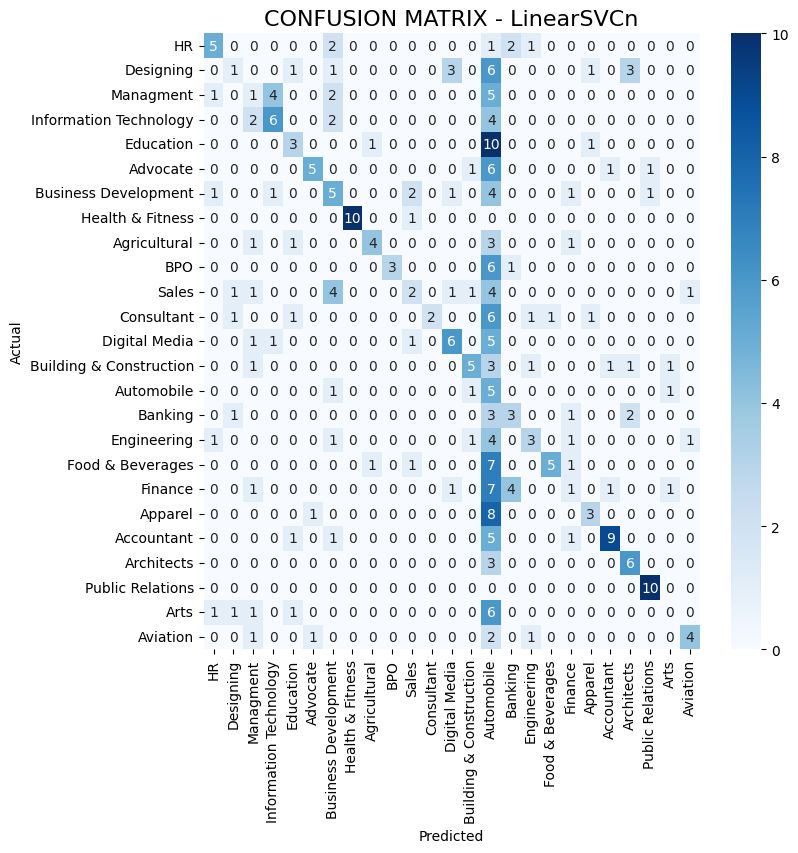

In [113]:
#confusion matrix to check miss classified predictions
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',
            xticklabels=category_id_df.category.values, 
            yticklabels=category_id_df.category.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - LinearSVCn", size=16);

Prediction

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 0)

In [115]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')
fitted_vectorizer = tfidf.fit(X_train)
tfidf_vectorizer_vectors = fitted_vectorizer.transform(X_train)

In [116]:
model = LinearSVC().fit(tfidf_vectorizer_vectors, y_train)

In [117]:
# Open the file in read mode
with open('output.txt', 'r') as file:
    # Read the lines from the file
    lines = file.readlines()

# Remove newline characters and whitespace from each line
lines = [line.strip() for line in lines]

# Process the lines and store them in a list
my_list = lines

# Print the list
print(my_list)

['Linux', 'HTML', 'Image Processing', 'Artificial Intelligence', 'Big Data Analytics', 'Project Management', 'E-commerce SEO', 'Entrepreneurship', 'Social Entrepreneurship', 'Mobile Application Development', 'Business Strategy', 'Consulting', 'Cyber-security', 'Information Security Consultancy', 'Online Marketing Analysis', 'PHP', 'IT Consulting', 'Social Media Consulting', 'E-commerce Consulting', 'Start-up Consulting']


In [118]:
#my_list = ['item1', 'item2', 'item3']

# Convert the list to a string with comma-separated elements
list_string = ', '.join(my_list)

print(list_string)

Linux, HTML, Image Processing, Artificial Intelligence, Big Data Analytics, Project Management, E-commerce SEO, Entrepreneurship, Social Entrepreneurship, Mobile Application Development, Business Strategy, Consulting, Cyber-security, Information Security Consultancy, Online Marketing Analysis, PHP, IT Consulting, Social Media Consulting, E-commerce Consulting, Start-up Consulting


In [119]:
skills = list_string
print(model.predict(fitted_vectorizer.transform([skills])))

['Information Technology']
